* interval -> ms

# Import Libraries

In [99]:
import numpy as np
import pandas as pd

import scipy.stats as stats

import matplotlib.pyplot as plt

plt.style.use("fivethirtyeight")

# POLO

### A

In [100]:
polo_a = pd.read_csv("./data/A/POLO_A_2025-01-31T17_59_47.140697Z-debug.csv")

polo_a.head()

,Timestamp,CommandSent,Response,Interval,CommandsCount,ResponsesCount,Failed
0,1738345800735,speed,0.0,335,1,1,0
1,1738345801078,rpm,983.0,140,2,2,0
2,1738345801218,engine_load,13.0,152,3,3,0
3,1738345801370,engine_oil_temperature,NO DATA\r>,116,4,4,1
4,1738345801486,coolant_temp,87.0,90,5,5,1


### B

In [101]:
polo_b = pd.read_csv("./data/B/POLO_B_2025-01-31T17_48_22.461519Z-debug.csv")

polo_b.head()

,Timestamp,CommandSent,Response,Interval,CommandsCount,ResponsesCount,Failed
0,1738345088711,speed,0.0,309,1,1,0
1,1738345088711,speed,0.0,323,1,2,0
2,1738345089034,rpm,981.0,162,2,4,0
3,1738345089034,rpm,981.0,169,2,5,0
4,1738345089240,engine_load,16.0,185,3,7,0


### Plotting

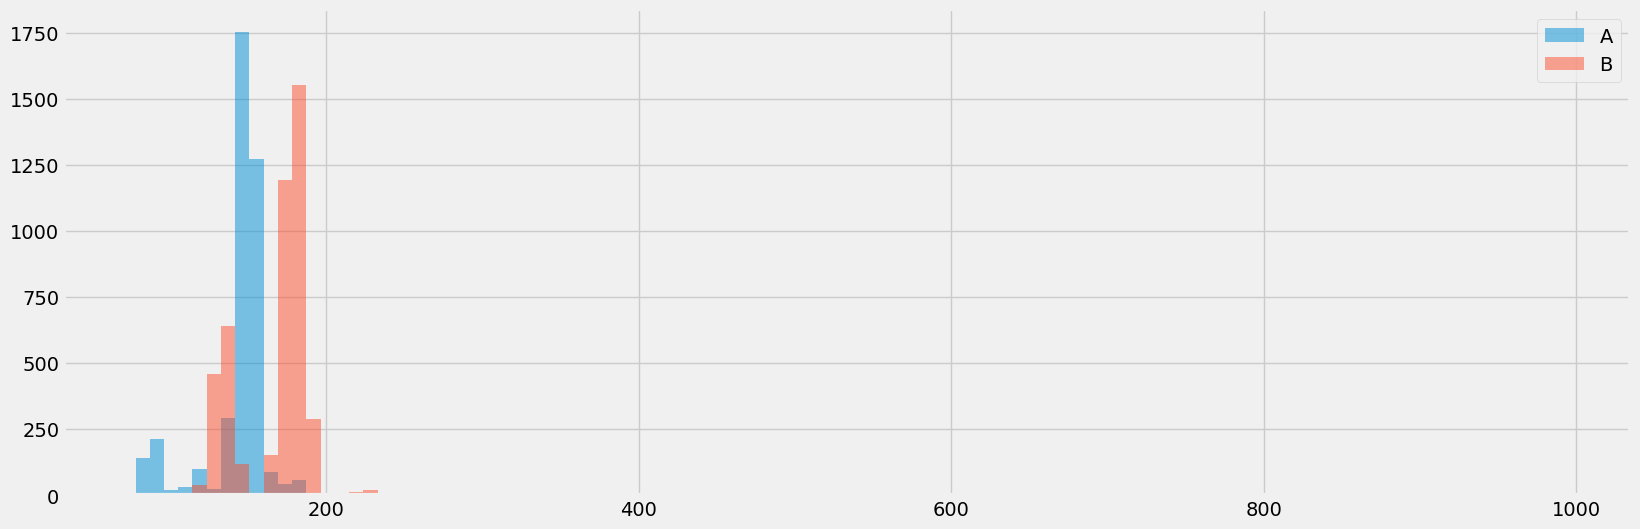

In [102]:
# Definir os limites mínimo e máximo considerando ambos os conjuntos de dados
min_value = min(polo_a["Interval"].min(), polo_b["Interval"].min())
max_value = max(polo_a["Interval"].max(), polo_b["Interval"].max())

# Criar bins com espaçamento uniforme
num_bins = 100
bins = np.linspace(min_value, max_value, num_bins + 1)  # num_bins + 1 para definir as bordas corretamente

plt.figure(figsize=(18, 6))

# Usar os bins compartilhados
plt.hist(polo_a["Interval"], bins=bins, alpha=0.5, label="A")
plt.hist(polo_b["Interval"], bins=bins, alpha=0.5, label="B")

plt.legend(loc='upper right')

plt.show()


In [103]:
polo_a_intervals = polo_a["Interval"].dropna().values
polo_b_intervals = polo_b["Interval"].dropna().values

In [104]:
t_stat, t_p_value = stats.ttest_ind(polo_a_intervals, polo_b_intervals, equal_var=False)
print(f"T-test: Statistic = {t_stat}, p-value = {t_p_value:.4f}")

T-test: Statistic = -45.08184923781335, p-value = 0.0000


# FIT

### A

In [105]:
fit_a = pd.read_csv("./data/A/FIT_A_2025-01-31T17_48_23.509583Z-debug.csv")

fit_a.head()

,Timestamp,CommandSent,Response,Interval,CommandsCount,ResponsesCount,Failed
0,1738345053621,speed,0.0,453,1,1,0
1,1738345054075,rpm,738.0,148,2,2,0
2,1738345054223,engine_load,22.0,151,3,3,0
3,1738345054375,engine_oil_temperature,NO DATA\r>,117,4,4,1
4,1738345054492,coolant_temp,81.0,90,5,5,1


### B

In [106]:
fit_b = pd.read_csv("./data/B/FIT_B_2025-01-31T18_00_37.690262Z-debug.csv")

fit_b.head()

,Timestamp,CommandSent,Response,Interval,CommandsCount,ResponsesCount,Failed
0,1738345789191,speed,0.0,152,1,1,0
1,1738345789374,rpm,762.0,119,2,3,0
2,1738345789523,engine_load,20.0,121,3,5,0
3,1738345789674,engine_oil_temperature,NO DATA,123,4,7,1
4,1738345789800,coolant_temp,88.0,110,5,9,1


### Plotting

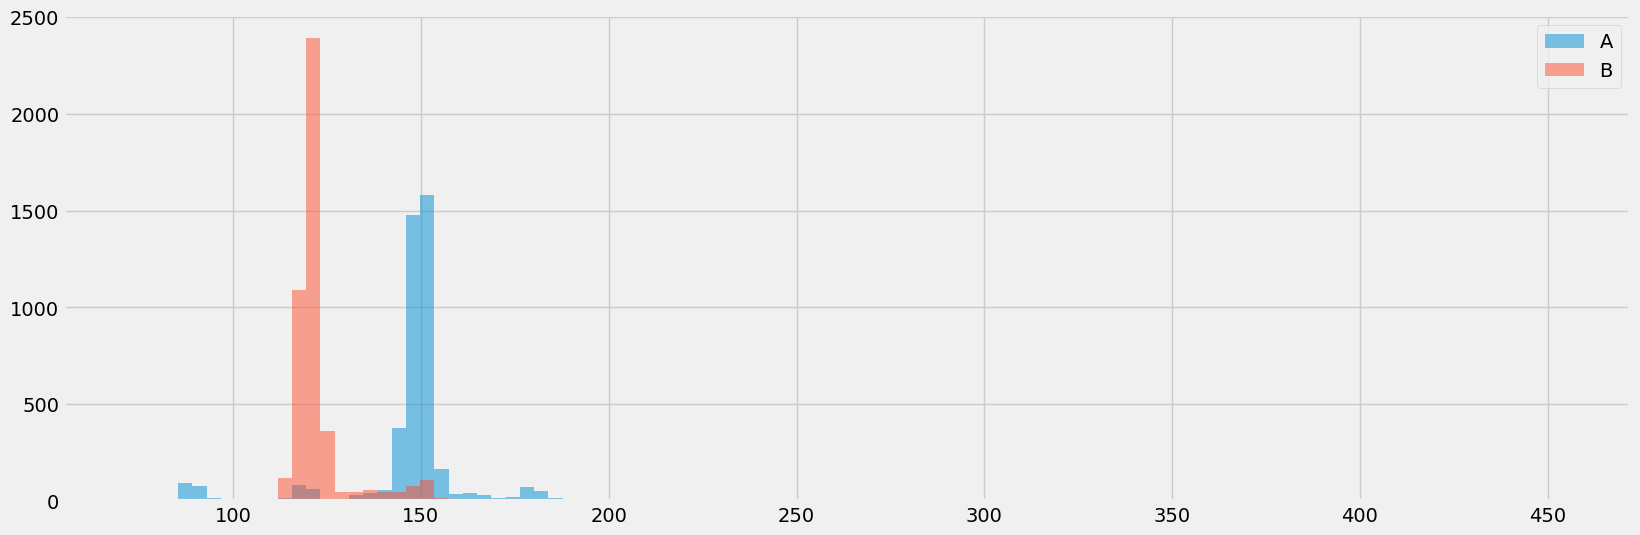

In [107]:
min_value = min(fit_a["Interval"].min(), fit_b["Interval"].min())
max_value = max(fit_a["Interval"].max(), fit_b["Interval"].max())

num_bins = 100
bins = np.linspace(min_value, max_value, num_bins + 1)

plt.figure(figsize=(18, 6))

plt.hist(fit_a["Interval"], bins=bins, alpha=0.5, label="A")
plt.hist(fit_b["Interval"], bins=bins, alpha=0.5, label="B")

plt.legend(loc='upper right')

plt.show()

In [109]:
fit_a_intervals = fit_a["Interval"].dropna().values
fit_b_intervals = fit_b["Interval"].dropna().values

In [110]:
t_stat, t_p_value = stats.ttest_ind(fit_a_intervals, fit_b_intervals, equal_var=False)
print(f"T-test: Statistic = {t_stat}, p-value = {t_p_value:.4f}")

T-test: Statistic = 86.33193884672912, p-value = 0.0000


# FASTBACK

### A

In [111]:
fastback_a = pd.read_csv("./data/A/FASTBACK_A_2025-01-31T18_25_37.743808Z-debug.csv")

fastback_a.head()

,Timestamp,CommandSent,Response,Interval,CommandsCount,ResponsesCount,Failed
0,1738347324917,speed,0.0,280,1,1,0
1,1738347325197,rpm,941.0,156,2,2,0
2,1738347325353,engine_load,40.0,143,3,3,0
3,1738347325497,engine_oil_temperature,127.0,150,4,4,0
4,1738347325647,coolant_temp,82.0,151,5,5,0


### B

In [112]:
fastback_b = pd.read_csv("./data/B/FASTBACK_B_2025-01-31T18_13_34.480439Z-debug.csv")

fastback_b = fastback_b.iloc[::2].reset_index(drop=True)

fastback_b.head()

,Timestamp,CommandSent,Response,Interval,CommandsCount,ResponsesCount,Failed
0,1738346625814,speed,0.0,173,1,1,0
1,1738346626015,rpm,1008.0,153,2,4,0
2,1738346626195,engine_load,47.0,154,3,7,0
3,1738346626375,engine_oil_temperature,96.0,153,4,10,0
4,1738346626530,coolant_temp,53.0,148,5,13,0


### Plotting

In [113]:
fastback_a_intervals = fastback_a["Interval"].dropna().values
fastback_b_intervals = fastback_b["Interval"].dropna().values

In [114]:
t_stat, t_p_value = stats.ttest_ind(fastback_a_intervals, fastback_b_intervals, equal_var=False)
print(f"T-test: Statistic = {t_stat}, p-value = {t_p_value:.4f}")

T-test: Statistic = 7.407115831617308, p-value = 0.0000


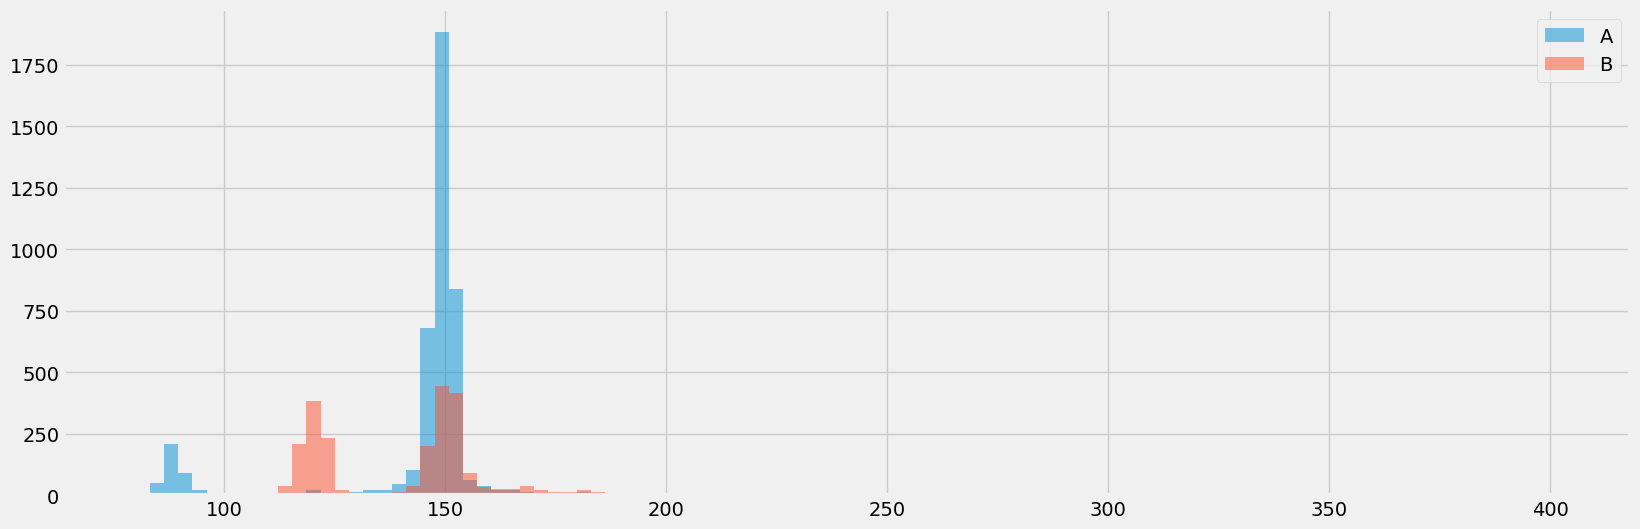

In [119]:
min_value = min(fastback_a["Interval"].min(), fastback_b["Interval"].min())
max_value = max(fastback_a["Interval"].max(), fastback_b["Interval"].max())

num_bins = 100
bins = np.linspace(min_value, max_value, num_bins + 1)

plt.figure(figsize=(18, 6))

plt.hist(fastback_a["Interval"], bins=bins, alpha=0.5, label="A")
plt.hist(fastback_b["Interval"], bins=bins, alpha=0.5, label="B")

plt.legend(loc='upper right')

plt.show()

# TCROSS

### A

In [115]:
tcross_a = pd.read_csv("./data/A/TCROSS_A_2025-01-31T18_13_48.052103Z-debug.csv")

tcross_a.head()

,Timestamp,CommandSent,Response,Interval,CommandsCount,ResponsesCount,Failed
0,1738346588337,fuel_pressure,NO DATA\r>,492,200,199,45
1,1738346588829,fuel_rail_pressure,NO DATA\r>,151,201,200,46
2,1738346588980,fuel_rail_gauge_pressure,NO DATA\r>,150,202,201,47
3,1738346589130,intake_manifold_absolut_pressure,65.0,149,203,202,47
4,1738346589279,timing_advance,-9.0,151,204,203,47


### B

In [116]:
tcross_b = pd.read_csv("./data/B/TCROSS_B_2025-01-31T18_25_15.916263Z-debug.csv")

tcross_b = tcross_b.iloc[::2].reset_index(drop=True)

tcross_b.head()

,Timestamp,CommandSent,Response,Interval,CommandsCount,ResponsesCount,Failed
0,1738347287369,speed,0.0,206,1,1,0
1,1738347287620,rpm,982.0,180,2,4,0
2,1738347287801,engine_load,15.0,180,3,7,0
3,1738347288025,engine_oil_temperature,NO DATA,134,4,10,1
4,1738347288160,coolant_temp,85.0,184,5,13,1


### Plotting

In [117]:
tcross_a_intervals = tcross_a["Interval"].dropna().values
tcross_b_intervals = tcross_b["Interval"].dropna().values

In [118]:
t_stat, t_p_value = stats.ttest_ind(tcross_a_intervals, tcross_b_intervals, equal_var=False)
print(f"T-test: Statistic = {t_stat}, p-value = {t_p_value:.4f}")

T-test: Statistic = -32.22883307550099, p-value = 0.0000


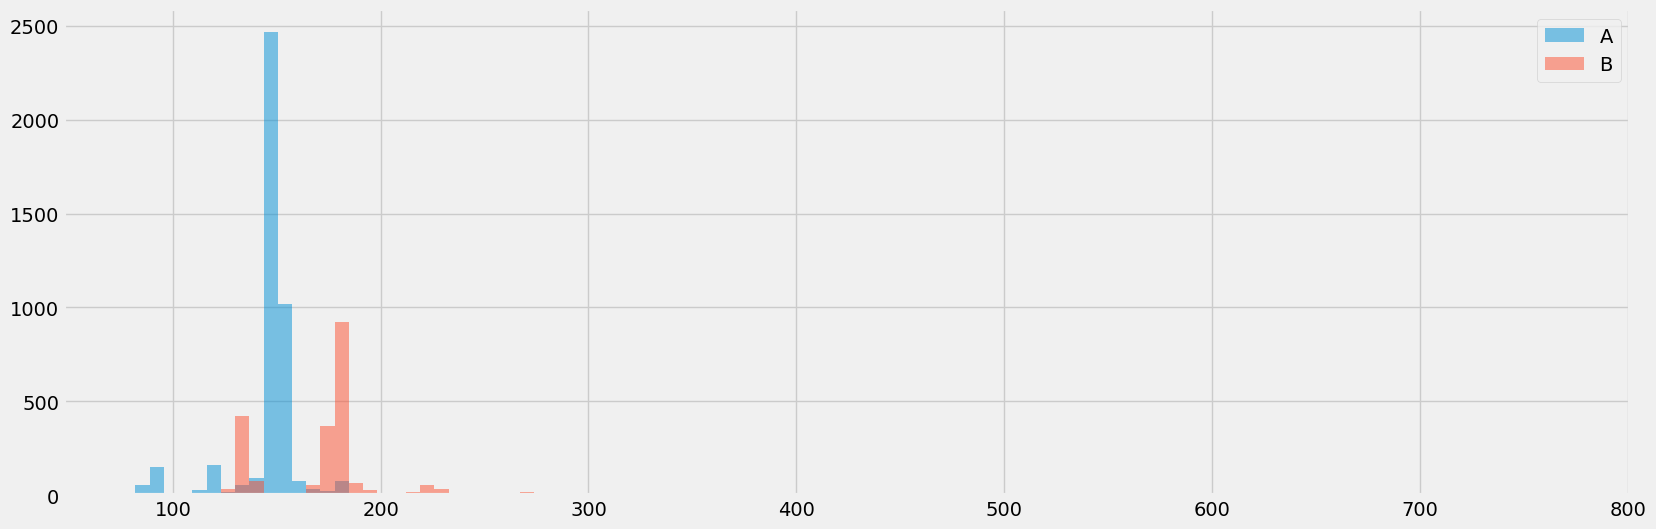

In [120]:
min_value = min(tcross_a["Interval"].min(), tcross_b["Interval"].min())
max_value = max(tcross_a["Interval"].max(), tcross_b["Interval"].max())

num_bins = 100
bins = np.linspace(min_value, max_value, num_bins + 1)

plt.figure(figsize=(18, 6))

plt.hist(tcross_a["Interval"], bins=bins, alpha=0.5, label="A")
plt.hist(tcross_b["Interval"], bins=bins, alpha=0.5, label="B")

plt.legend(loc='upper right')

plt.show()

# Statistics